In [1]:
library(MASS)
library(ggplot2)
library(lattice)
library(caret)
library(klaR)
library(ElemStatLearn)
library(mlbench)
library(keras)
library(tensorflow)

Warning message:
“replacing previous import ‘ggplot2::empty’ by ‘plyr::empty’ when loading ‘caret’”
Attaching package: ‘tensorflow’

The following object is masked from ‘package:caret’:

    train



In [2]:
train_data <- read.csv("../input/emnist-letters-train.csv")
test_data <- read.csv("../input/emnist-letters-test.csv")

In [3]:
#train_data[,1] <- train_data$X23
train_data[,2:785] <- train_data[,2:785]/255.0;

In [4]:
str(train_data)

'data.frame':	88799 obs. of  785 variables:
 $ X23    : int  7 16 15 23 17 13 11 22 24 10 ...
 $ X0     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.4   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.5   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.6   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.7   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.8   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.9   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.10  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.11  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.12  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.13  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.14  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.15  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.16  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.17  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.18  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.19  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.20  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.21  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X

In [5]:
trainx <- train_data[,-1]
train_pca <- prcomp(trainx,center = TRUE)

In [6]:
a <- train_pca$x[,1:250]

In [7]:
trainy <- train_data[1:75000,1]
testy <- test_data[75001:88799,1]
trainx <- a[1:75000,]
testx <- a[75001:88799,-1]

In [8]:
str(trainx)

 num [1:75000, 1:250] 5.57 -3.09 4.57 4.08 -2.92 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:250] "PC1" "PC2" "PC3" "PC4" ...


In [9]:
#trainy <- as.factor(as.character((trainy))

In [10]:
#testy <- as.factor(as.character((testy))

In [11]:
trainy=trainy-1

In [12]:
testy = testy-1

In [13]:
y_train <- to_categorical(trainy, 26)
#y_test <- to_categorical(testy, 26)

In [14]:
model_keras <- keras_model_sequential()

In [15]:
 
model_keras<-model_keras %>% 
  layer_dense(units = 128, activation = 'relu', input_shape = c(250)) %>% 
  layer_dropout(rate = 0.3) %>% 
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%  
  #layer_dense(units = 32, activation = 'relu') %>%
  #slayer_dropout(rate = 0.3) %>%
  #layer_dense(units = 16, activation = 'relu') %>%
  #layer_dropout(rate = 0.3) %>%
  layer_dense(units = 26, activation = 'softmax')

In [16]:
model_keras

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 128)                     32128       
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 64)                      0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 26)                      1690        
Total params: 42,074
Trainable params: 42,074
Non-trainable params: 0
_________________________________

In [17]:
model_keras %>% compile(
  loss = 'sparse_categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

In [18]:
history <- model_keras %>% 
fit(
  trainx, trainy, 
  epochs = 400, batch_size = 128, 
  validation_split = 0.2
)

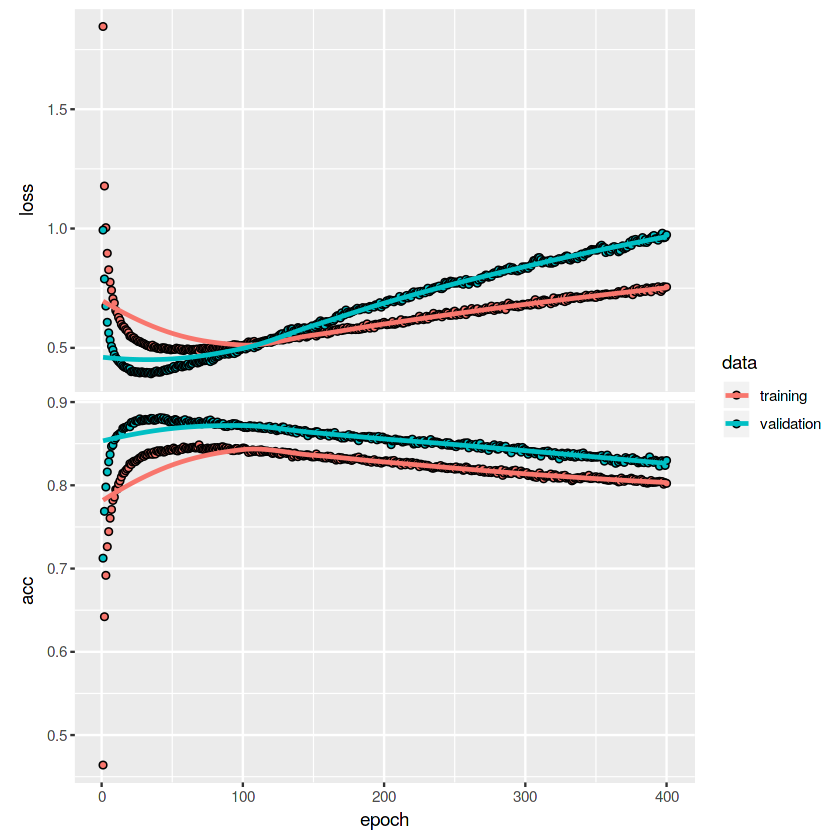

In [19]:
plot(history)